# ASO and ATL08: Spatial Extent Comparison

In [1]:
!pip install earthpy

In [2]:
#Open, Plot, and Explore Raster Data with Python 
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/open-lidar-raster-python/
#Applied to ASO Snow Off data from Tuolumne Meadows (downloaded from Linux Box Storage)

# Import necessary packages
import os
import rasterio
from rasterio.enums import Resampling
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from rasterstats import zonal_stats
import statistics
import scipy.stats as stats
# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
import rioxarray as riox
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

%matplotlib inline

In [3]:
#set working directory?
os.chdir(os.path.join(et.io.HOME, 
                      'ICESat-2_Snowdepth'))

In [4]:
dem_path = os.path.join("data",
                       "mcc_dem_3p0m_agg_TUOtrimmed_MANUAL.tif")

In [5]:
ATL08_path = os.path.join("data/ATL08_simplified/")

In [6]:
# Proceess and Open Snow-Off Data
# Open the file using a context manager ("with rio.open" statement)

with rio.open(dem_path) as dem:
    dem_arr = dem.read(1)
    dem_meta = dem.profile
    dem_plot_ext = plotting_extent(dem)
    print(dem.crs)

#Clean raster by removing zero values
dem_arr[dem_arr == (-9999.)] = np.nan
dem_arr[dem_arr == (0.)] = np.nan

print(dem_plot_ext)
xmin,ymin,xmax,ymax = dem.bounds

EPSG:32611
(254247.0, 307344.0, 4179327.0, 4229667.0)


In [7]:
upscale_factor = 1/3 # ooopsies isn't this technically a downscale? my bad ---eric

with rasterio.open(dem_path) as dataset:

    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.nearest #billinear resamping..... change here
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )

In [8]:
dem_9m = data[0,:,:]

In [28]:
filetype = '*.csv'

files = [f for f in os.listdir(ATL08_path) if f.endswith(filetype[1:])]

In [29]:
# def open_atl08(fname):
    
#     #df = f'df{fname[20:23]}_{fname[11:14]}'
#     df = pd.read_csv(ATL08_path+fname, index_col=0)
#     gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.x, df.y))
#     #df.rename(f'df{fname[20:23]}_{fname[11:14]}')
#     gdf.rename(f'gdf{fname[20:22]}_{fname[10:14]}')
#     #f'df{fname[19:22]}_{fname[11:14]}' = df
#     f'gdf{fname[19:22]}_{fname[11:14]}' = gdf

In [30]:
def open_atl08(fname):
    
    df = pd.read_csv(ATL08_path+fname, index_col=0)
    globals()[f'gdf{fname[20:22]}_{fname[10:14]}'] = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.x, df.y))
    print(f'gdf{fname[20:22]}_{fname[10:14]}')
    return globals()[f'gdf{fname[20:22]}_{fname[10:14]}']

gdf3l_0805
gdf2l_1011
gdf3l_1011
gdf1l_1011
gdf1r_1006
gdf3r_1011
gdf1r_1011
gdf1l_1006
gdf3r_1006
gdf1l_0810
gdf1r_0810
gdf3r_0805
gdf2r_1011
gdf1r_0805
gdf3l_0810
gdf2l_0805
gdf1l_0805
gdf2l_1006
gdf2l_0810
gdf2r_1006
gdf3r_0810
gdf1l_0908
gdf2r_0810
gdf3l_1006
gdf2r_0805


In [40]:
len(tracks)

25

In [14]:
# df3r_0805 = pd.read_csv(ATL08_path+'ATL08_20200805035_gt3r.csv', index_col=0)
# gdf3r_0805 = gpd.GeoDataFrame(df3r_0805,geometry=gpd.points_from_xy(df3r_0805.x, df3r_0805.y))

# df3r_0810 = pd.read_csv(ATL08_path+'ATL08_20200810153_gt3r.csv', index_col=0)
# gdf3r_0810 = gpd.GeoDataFrame(df3r_0810,geometry=gpd.points_from_xy(df3r_0810.x, df3r_0810.y))

# df1l_0908 = pd.read_csv(ATL08_path+'ATL08_20200908141_gt1l.csv', index_col=0)
# gdf1l_0908 = gpd.GeoDataFrame(df1l_0908,geometry=gpd.points_from_xy(df1l_0908.x, df1l_0908.y))

# df3r_1006 = pd.read_csv(ATL08_path+'ATL08_20201006010_gt3r.csv', index_col=0)
# gdf3r_1006 = gpd.GeoDataFrame(df3r_1006,geometry=gpd.points_from_xy(df3r_1006.x, df3r_1006.y))

# df3r_1011 = pd.read_csv(ATL08_path+'ATL08_20201011123_gt3r.csv', index_col=0)
# gdf3r_1011 = gpd.GeoDataFrame(df3r_1011,geometry=gpd.points_from_xy(df3r_1011.x, df3r_1011.y))

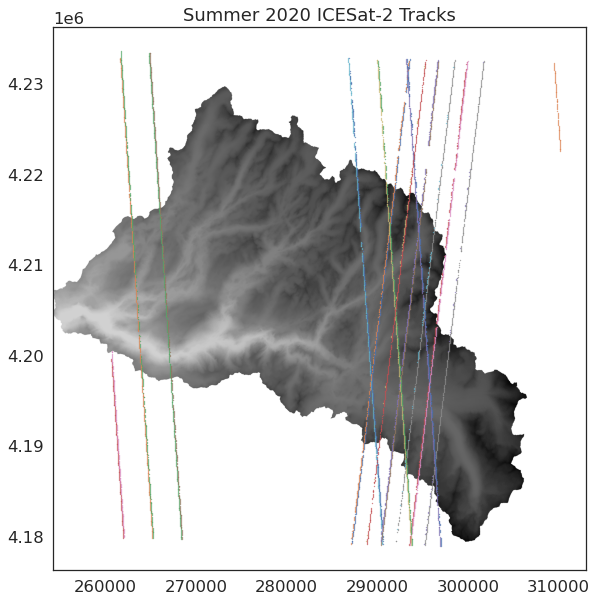

In [34]:
f, ax = plt.subplots(figsize = (10,10))
plt.title('Summer 2020 ICESat-2 Tracks')
im = ax.imshow(dem_9m, cmap='Greys', extent=[xmin,xmax,ymin,ymax])
for track in tracks:
    track.plot(ax=ax, markersize=0.1)

In [41]:
type(tracks[0])

geopandas.geodataframe.GeoDataFrame

In [36]:
# tracks_d = []
# type(tracks)

In [37]:
# type(tracks_d[1])

In [38]:
# for file in files:
#     tracks_d.append(open_atl08_d(file))

In [39]:
# def open_atl08_d(fname):
    
#     d = {}
#     df = pd.read_csv(ATL08_path+fname, index_col=0)
#     d[f'gdf{fname[20:22]}_{fname[10:14]}'] = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.x, df.y))
#     print(f'gdf{fname[20:22]}_{fname[10:14]}')
#     return d

In [35]:
#open_atl08_d('ATL08_20200805035_gt1r.csv')